In [41]:
import pandas as pd
import numpy as np
import community
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
us = pd.read_csv('../data/us_equities_cleaned.csv')

In [57]:
clipped_us = us.iloc[:2001,2:52]
clipped_us_returns = np.log(clipped_us).diff()
clipped_us_returns = clipped_us_returns.iloc[1:,]
names = clipped_us_returns.columns
correl_m = clipped_us_returns.corr()
correl_m = np.array(correl_m)
correl_m = np.abs(correl_m)
np.fill_diagonal(correl_m,0)
np.shape(correl_m)


Index(['GE', 'IBM', 'DIS', 'BA', 'CAT', 'AA', 'HPQ', 'DD', 'KO', 'XOM', 'PG',
       'JNJ', 'CVX', 'MCD', 'MRK', 'UTX', 'MMM', 'MO', 'HON', 'ED', 'GT',
       'AEP', 'FL', 'MRO', 'DTE', 'IP', 'CNP', 'NAV', 'WMT', 'BMY', 'BP',
       'LMT', 'C', 'KR', 'AET', 'XRX', 'F', 'DOW', 'PEP', 'CL', 'UIS', 'GD',
       'WY', 'AXP', 'FRM', 'ASA', 'EXC', 'UNP', 'EIX', 'LUV'],
      dtype='object')


(50, 50)

In [51]:
G = nx.from_numpy_array(correl_m)

In [52]:
partition = community.best_partition(G)

/Users/mike/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


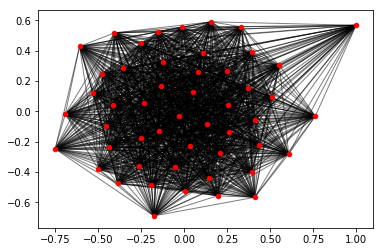

In [53]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20)


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [73]:
for i in partition:
    

TypeError: cannot unpack non-iterable int object